## Innovative Solution for Water Conservation
Welcome to this Jupyter Notebook. The project centers on advancing water conservation in the hotel industry through a unique solution: a gamified certification system. By combining competition with rewards, the approach aims to foster sustainable water use. Aligned with Vitens' goal, the project targets a 20% reduction in hotel water usage by 2030. It employs data-driven strategies to create predictive models, aiding in the anticipation of water needs and the establishment of realistic conservation targets.

## Technology and Predictive Analytics
The project utilizes AI and predictive analytics to examine historical water consumption and predict future demands. Starting with Linear Regression and potentially progressing to more complex models like Random Forest, the objective is to provide actionable insights for water conservation. Model performance will be evaluated through metrics such as R-squared and RMSE.

## Implementation of ML Models
The focus here is on deploying Machine Learning models to forecast hotel water usage, critical for meeting future water reduction benchmarks. This involves:

* Applying regression models to accurately estimate future consumption, guiding effective water-saving actions.
* Developing reliable predictive models to underpin water conservation efforts, aiming at environmental sustainability.

This notebook will guide through data processing, model building, and analysis, aiming to empower effective water management in the hotel sector.

## The stepas:

* 1- Creating a Hypothetical Dataset: 
Since I don't have real historical data, i want to generating a fictional dataset with various hotel attributes that could influence water consumption.

* 2- Data Preprocessing: 
This involves cleaning the data, handling missing values, encoding categorical variables, and splitting the data into training and testing sets.

* 3- Feature Selection: 
Identifying the most relevant features that impact water usage in hotels.

* 4- Model Selection and Training: 
Starting with simpler models like Linear Regression and potentially moving to more complex ones if necessary.

* 5- Model Evaluation: 
Using metrics such as R-squared or RMSE to assess the performance of your ML model.

* 6- Integration and Feedback Loop: 
Implementing the model in my mobile application and setting up a system to collect feedback to continually refine the model.

## Step 1: Creating a hypothetical dataset

Based on the academic sources and industry studies, consider including the following features(Antonova et al., 2023):

* Hotel Location: (City, country, climate zone).
* Hotel Size: (Number of rooms, total area).
* Occupancy Rate: (Average percentage of occupied rooms).
* Amenities: (Presence of pools, spas, gardens).
* Water-Saving Measures: (Types of water-saving measures implemented (e.g., low-flow faucets)).
* Season: (Time of year, since water usage can vary seasonally).
* Average Length of Stay: (Average number of nights guests stay).
* Water Usage: Historical water usage data (this will be my target variable).

In [1]:
import pandas as pd
import numpy as np

# Set the random seed for reproducibility
np.random.seed(42)

# Define the number of samples
n_samples = 100

# Create the dataset
data = {
    'Location': np.random.choice(['City', 'Suburb', 'Countryside'], n_samples),
    'Hotel_Size': np.random.choice(['Small', 'Medium', 'Large'], n_samples),
    'Occupancy_Rate': np.random.uniform(10, 100, n_samples),
    'Has_Pool': np.random.choice([True, False], n_samples),
    'Has_Spa': np.random.choice([True, False], n_samples),
    'Has_Garden': np.random.choice([True, False], n_samples),
    'Water_Saving_Measures': np.random.choice(['Low-Flow Faucets', 'Rainwater Harvesting', 'Greywater Recycling', 'None'], n_samples),
    'Season': np.random.choice(['Spring', 'Summer', 'Fall', 'Winter'], n_samples),
    'Average_Length_of_Stay': np.random.uniform(1, 14, n_samples),  # Average days
    'Water_Usage': np.random.uniform(1000, 10000, n_samples)  # Liters per day
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Show the first few rows of the dataset
df.head()


,Location,Hotel_Size,Occupancy_Rate,Has_Pool,Has_Spa,Has_Garden,Water_Saving_Measures,Season,Average_Length_of_Stay,Water_Usage
0,Countryside,Large,46.345255,False,False,True,Low-Flow Faucets,Fall,13.463131,5141.072431
1,City,Large,15.840302,True,True,False,Low-Flow Faucets,Summer,1.752231,6262.894954
2,Countryside,Large,32.852387,False,False,False,None,Summer,6.128783,4602.704400
3,Countryside,Small,32.218846,True,False,False,None,Spring,2.387829,7279.008163
4,City,Large,72.667385,False,False,False,Greywater Recycling,Spring,5.363581,2620.605451


Trying to make 10.000 rows not clean dataset 

In [3]:
import pandas as pd
import numpy as np
from datetime import timedelta, datetime

# Settings for the dataset
n_large_samples = 10000  # Number of data points
end_date = datetime.today()
start_date = end_date - timedelta(days=3 * 365)  # Last three years
dates = pd.date_range(start=start_date, end=end_date, periods=n_large_samples)

# Creating the dataset with some intentional missing values for cleaning practice
data = {
    'Date': dates.date,
    'Location': np.random.choice(['City', 'Suburb', 'Countryside', None], n_large_samples, p=[0.3, 0.3, 0.3, 0.1]),
    'Hotel_Size': np.random.choice(['Small', 'Medium', 'Large', 'Extra-large', None], n_large_samples, p=[0.25, 0.25, 0.25, 0.15, 0.1]),
    'Occupancy_Rate': np.concatenate((np.random.uniform(0, 100, n_large_samples - 50), np.full(50, -1))),
    'Has_Pool': np.random.choice([True, False, None], n_large_samples, p=[0.45, 0.45, 0.1]),
    'Has_Spa': np.random.choice([True, False, None], n_large_samples, p=[0.45, 0.45, 0.1]),
    'Has_Garden': np.random.choice([True, False, None], n_large_samples, p=[0.45, 0.45, 0.1]),
    'Water_Saving_Measures': np.random.choice(['Low-Flow Faucets', 'Rainwater Harvesting', 'Greywater Recycling', 'None', None], n_large_samples, p=[0.25, 0.25, 0.25, 0.2, 0.05]),
    'Season': np.random.choice(['Spring', 'Summer', 'Fall', 'Winter', None], n_large_samples, p=[0.25, 0.25, 0.25, 0.2, 0.05]),
    'Average_Length_of_Stay': np.concatenate((np.random.uniform(1, 14, n_large_samples - 100), np.full(100, -1))),
    'Water_Usage': np.concatenate((np.random.uniform(500, 15000, n_large_samples - 100), np.full(100, -1)))
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Save the DataFrame as a CSV file
csv_file_path = 'hotel_water_usage_large.csv'  # You can change the path as needed
df.to_csv(csv_file_path, index=False)
# Show the first few rows of the dataset
df.head()


,Date,Location,Hotel_Size,Occupancy_Rate,Has_Pool,Has_Spa,Has_Garden,Water_Saving_Measures,Season,Average_Length_of_Stay,Water_Usage
0,2021-03-11,None,Small,85.020258,True,False,True,Low-Flow Faucets,Winter,12.356125,2231.588163
1,2021-03-11,None,Small,81.123189,False,False,False,Greywater Recycling,Spring,9.282488,13968.008880
2,2021-03-11,Countryside,Extra-large,27.010434,False,False,False,None,Winter,12.133129,12081.472081
3,2021-03-12,Countryside,Medium,78.759777,True,True,False,Greywater Recycling,Fall,4.039508,3131.881788
4,2021-03-12,Suburb,Extra-large,37.477490,True,False,False,Rainwater Harvesting,Fall,7.796984,11081.084016


## Step 2: Data Preprocessing

This step includes cleaning the dataset to handle missing values, outliers, and encoding categorical variables. Here's what I typically need to do:

1- Handling Missing Values: remove rows with missing values or fill them in with a default value, such as the mean or median for numerical features, or the most common value for categorical features.

2- Encoding Categorical Variables: Machine learning models usually require input to be numerical. Therefore, I'll need to convert categorical variables (like 'Location', 'Hotel_Size', etc.) into numerical format, often through one-hot encoding or label encoding.

3- Outlier Detection and Handling: Identify outliers in my dataset that can show the results and decide whether to remove them or adjust them.

    Step 1: Handling Missing Values
First, we'll check for missing values and decide on a strategy for each column with missing data.

In [4]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])  # Print columns with missing values


Location                 1017
Hotel_Size               1005
Has_Pool                  968
Has_Spa                  1016
Has_Garden               1042
Water_Saving_Measures     493
Season                    502
dtype: int64


Based on the output, decided to fill missing values with the median (for numerical columns) or the mode (for categorical columns), or to drop rows/columns with missing values.

In [6]:
# Fill in missing numerical values with the median
for col in ['Occupancy_Rate', 'Average_Length_of_Stay', 'Water_Usage']:
    if df[col].isnull().any():
        df[col].fillna(df[col].median(), inplace=True)

# Fill in missing categorical values with the mode
for col in ['Location', 'Hotel_Size', 'Has_Pool', 'Has_Spa', 'Has_Garden', 'Water_Saving_Measures', 'Season']:
    if df[col].isnull().any():
        df[col].fillna(df[col].mode()[0], inplace=True)
df.head()  # Display the first few rows of the dataframe

,Date,Location,Hotel_Size,Occupancy_Rate,Has_Pool,Has_Spa,Has_Garden,Water_Saving_Measures,Season,Average_Length_of_Stay,Water_Usage
0,2021-03-11,Countryside,Small,85.020258,True,False,True,Low-Flow Faucets,Winter,12.356125,2231.588163
1,2021-03-11,Countryside,Small,81.123189,False,False,False,Greywater Recycling,Spring,9.282488,13968.008880
2,2021-03-11,Countryside,Extra-large,27.010434,False,False,False,None,Winter,12.133129,12081.472081
3,2021-03-12,Countryside,Medium,78.759777,True,True,False,Greywater Recycling,Fall,4.039508,3131.881788
4,2021-03-12,Suburb,Extra-large,37.477490,True,False,False,Rainwater Harvesting,Fall,7.796984,11081.084016


    Step 2: Encoding Categorical Variables

convert categorical variables into numerical format by useing one-hot encoding 

In [8]:
# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=['Location', 'Hotel_Size', 'Has_Pool', 'Has_Spa', 'Has_Garden', 'Water_Saving_Measures', 'Season'])
df.head()  # Display the first few rows of the dataframe

,Date,Location,Hotel_Size,Occupancy_Rate,Has_Pool,Has_Spa,Has_Garden,Water_Saving_Measures,Season,Average_Length_of_Stay,Water_Usage
0,2021-03-11,Countryside,Small,85.020258,True,False,True,Low-Flow Faucets,Winter,12.356125,2231.588163
1,2021-03-11,Countryside,Small,81.123189,False,False,False,Greywater Recycling,Spring,9.282488,13968.008880
2,2021-03-11,Countryside,Extra-large,27.010434,False,False,False,None,Winter,12.133129,12081.472081
3,2021-03-12,Countryside,Medium,78.759777,True,True,False,Greywater Recycling,Fall,4.039508,3131.881788
4,2021-03-12,Suburb,Extra-large,37.477490,True,False,False,Rainwater Harvesting,Fall,7.796984,11081.084016


    Step 3: Outlier Detection and Handling

identify outliers in numerical data

applying a method to cap outliers at the lower and upper bounds calculated based on the Interquartile Range (IQR). This method retains all data points while adjusting extreme values:

In [10]:
# List of numerical columns to check for outliers
numerical_cols = ['Occupancy_Rate', 'Average_Length_of_Stay', 'Water_Usage']

# Apply outlier detection and handling for each numerical column
for col in numerical_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Cap outliers
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
df.head()  # Display the first few rows of the dataframe

,Date,Location,Hotel_Size,Occupancy_Rate,Has_Pool,Has_Spa,Has_Garden,Water_Saving_Measures,Season,Average_Length_of_Stay,Water_Usage
0,2021-03-11,Countryside,Small,85.020258,True,False,True,Low-Flow Faucets,Winter,12.356125,2231.588163
1,2021-03-11,Countryside,Small,81.123189,False,False,False,Greywater Recycling,Spring,9.282488,13968.008880
2,2021-03-11,Countryside,Extra-large,27.010434,False,False,False,None,Winter,12.133129,12081.472081
3,2021-03-12,Countryside,Medium,78.759777,True,True,False,Greywater Recycling,Fall,4.039508,3131.881788
4,2021-03-12,Suburb,Extra-large,37.477490,True,False,False,Rainwater Harvesting,Fall,7.796984,11081.084016


plotting the distributions before and after outlier handling to visually confirm the adjustment

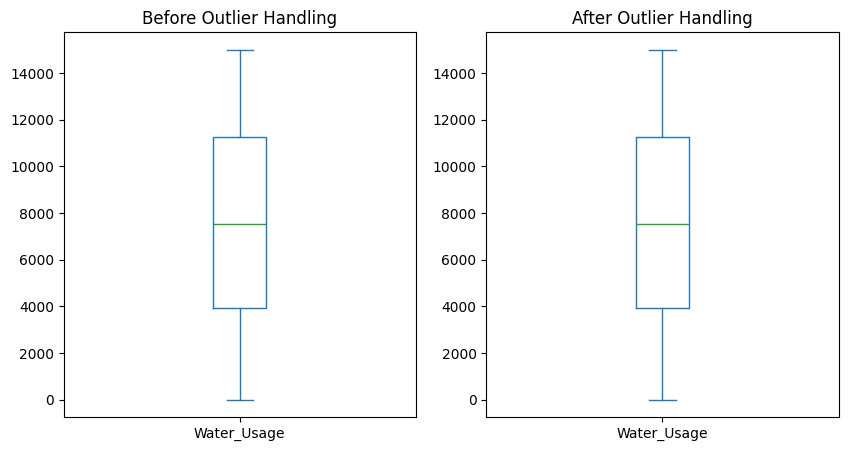

In [11]:
import matplotlib.pyplot as plt

# Replace 'Water_Usage' with any numerical column to inspect
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
df['Water_Usage'].plot(kind='box', title='Before Outlier Handling')
plt.subplot(1, 2, 2)
df_encoded['Water_Usage'].plot(kind='box', title='After Outlier Handling')
plt.show()


    Step 4: Model Selection and Training
choose a machine learning model and use cleaned dataset to train it. For predicting continuous values like 'Water_Usage', usually start with a linear regression model as it's simple and works well as a baseline.

linear regression model 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# df_encoded is final dataset after preprocessing
X = df_encoded.drop('Water_Usage', axis=1)  # Features
y = df_encoded['Water_Usage']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting the Test set results
y_pred = model.predict(X_test)

# Evaluating the Model
print("Model's R-squared score:", r2_score(y_test, y_pred))
print("Model's Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))


 ** there's an issue with trying to fit a linear regression model when one or more of features are dates (datetime.date). Most machine learning algorithms, including linear regression in scikit-learn, require numerical input and cannot handle date types directly.

To resolve this issue, I can convert date features into numerical values that represent a more interpretable format for the model. Common approaches include:

option1- Ordinal Encoding: Convert the date into the number of days since the earliest date in my dataset.

option2- Extracting Date Components: Convert the date into separate numerical features such as year, month, and day.

Option 2: Extracting Date Components


In [16]:
from pandas import to_datetime

# Convert 'Date' column to datetime format
if 'Date' in df_encoded.columns:
    df_encoded['Date'] = to_datetime(df_encoded['Date'])

    # Now that 'Date' is in datetime format, extract the components
    df_encoded['Year'] = df_encoded['Date'].dt.year
    df_encoded['Month'] = df_encoded['Date'].dt.month
    df_encoded['Day'] = df_encoded['Date'].dt.day

    # Drop the original 'Date' column if no longer needed
    df_encoded.drop('Date', axis=1, inplace=True)


running the model again without errors and see the results

linear regression model 

In [18]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# df_encoded is final dataset after preprocessing
X = df_encoded.drop('Water_Usage', axis=1)  # Features
y = df_encoded['Water_Usage']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting the Test set results
y_pred = model.predict(X_test)

# Evaluating the Model
print("Model's R-squared score:", r2_score(y_test, y_pred))
print("Model's Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))

Model's R-squared score: 0.0006463930371845006
Model's Mean Squared Error (MSE): 17361265.714253075


 Decision Tree model:

In [19]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and train the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predict and evaluate
dt_pred = dt_model.predict(X_test)
print("Decision Tree R-squared score:", r2_score(y_test, dt_pred))
print("Decision Tree Mean Squared Error (MSE):", mean_squared_error(y_test, dt_pred))


Decision Tree R-squared score: -0.9657396938061917
Decision Tree Mean Squared Error (MSE): 34149803.344326764


Random Forest Regressor model:

In [21]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # 100 trees in the forest

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
rf_pred = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest R-squared score:", r2_score(y_test, rf_pred))
print("Random Forest Mean Squared Error (MSE):", mean_squared_error(y_test, rf_pred))


Random Forest R-squared score: 0.010870651721413216
Random Forest Mean Squared Error (MSE): 17183644.82960182


Gradient Boosting Machine (GBM) model:

In [22]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting Regressor
gbm_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
gbm_model.fit(X_train, y_train)

# Make predictions
gbm_pred = gbm_model.predict(X_test)

# Evaluate the model
print("Gradient Boosting Machine R-squared score:", r2_score(y_test, gbm_pred))
print("Gradient Boosting Machine Mean Squared Error (MSE):", mean_squared_error(y_test, gbm_pred))


Gradient Boosting Machine R-squared score: 0.028140326097138235
Gradient Boosting Machine Mean Squared Error (MSE): 16883627.494850017


    compare the results of the four models

first need to capture the performance metrics for each model in a structured format. Then plot them for visual comparison 

                   R-squared           MSE
Linear Regression   0.000646  1.736127e+07
Decision Tree      -0.965740  3.414980e+07
Random Forest       0.010871  1.718364e+07
Gradient Boosting   0.028140  1.688363e+07


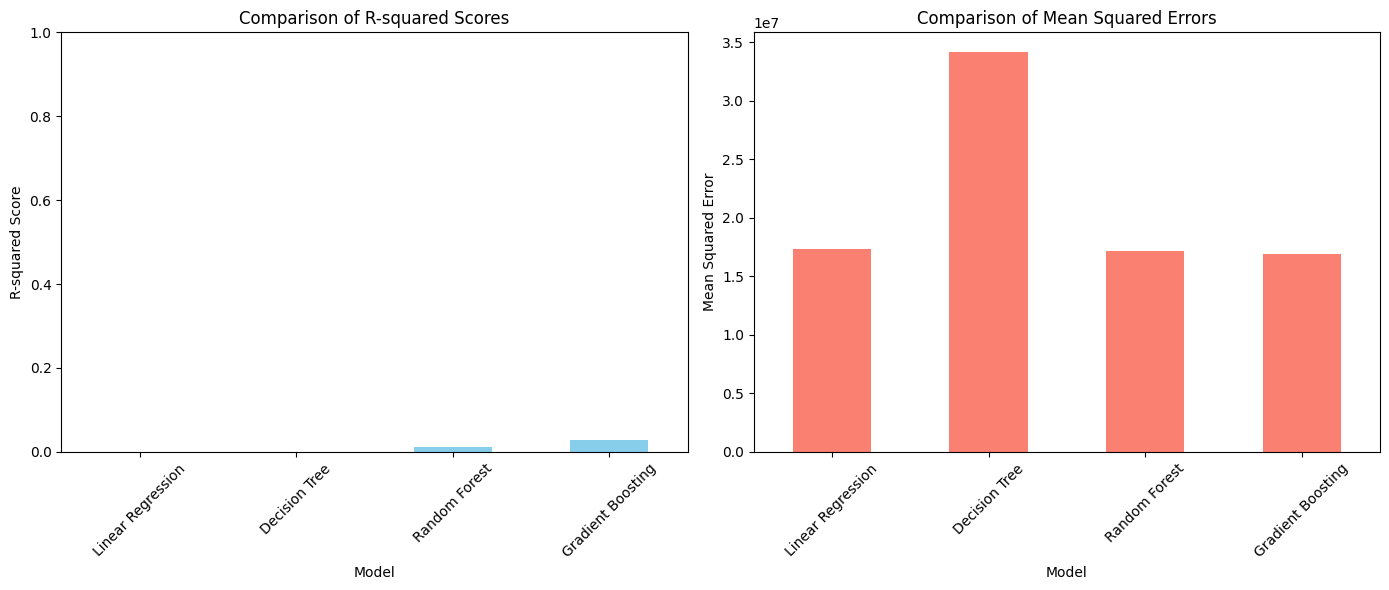

In [25]:
# Collecting metrics
model_metrics = {
    'Linear Regression': {'R2': r2_score(y_test, y_pred), 'MSE': mean_squared_error(y_test, y_pred)},
    'Decision Tree': {'R2': r2_score(y_test, dt_pred), 'MSE': mean_squared_error(y_test, dt_pred)},
    'Random Forest': {'R2': r2_score(y_test, rf_pred), 'MSE': mean_squared_error(y_test, rf_pred)},
    'Gradient Boosting': {'R2': r2_score(y_test, gbm_pred), 'MSE': mean_squared_error(y_test, gbm_pred)}
}

# Convert the metrics dictionary to a DataFrame for easier manipulation
import pandas as pd
metrics_df = pd.DataFrame(model_metrics).T  # Transpose for easier comparison
metrics_df.columns = ['R-squared', 'MSE']

# Display the metrics for all models
print(metrics_df)

# Visualize the comparison
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# Plot R-squared scores
plt.subplot(1, 2, 1)
metrics_df['R-squared'].plot(kind='bar', color='skyblue')
plt.title('Comparison of R-squared Scores')
plt.ylabel('R-squared Score')
plt.ylim(0, 1)  # R-squared ranges from 0 to 1
plt.xlabel('Model')
plt.xticks(rotation=45)

# Plot MSE scores
plt.subplot(1, 2, 2)
metrics_df['MSE'].plot(kind='bar', color='salmon')
plt.title('Comparison of Mean Squared Errors')
plt.ylabel('Mean Squared Error')
plt.xlabel('Model')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



Combined Bar Chart for Both Metrics

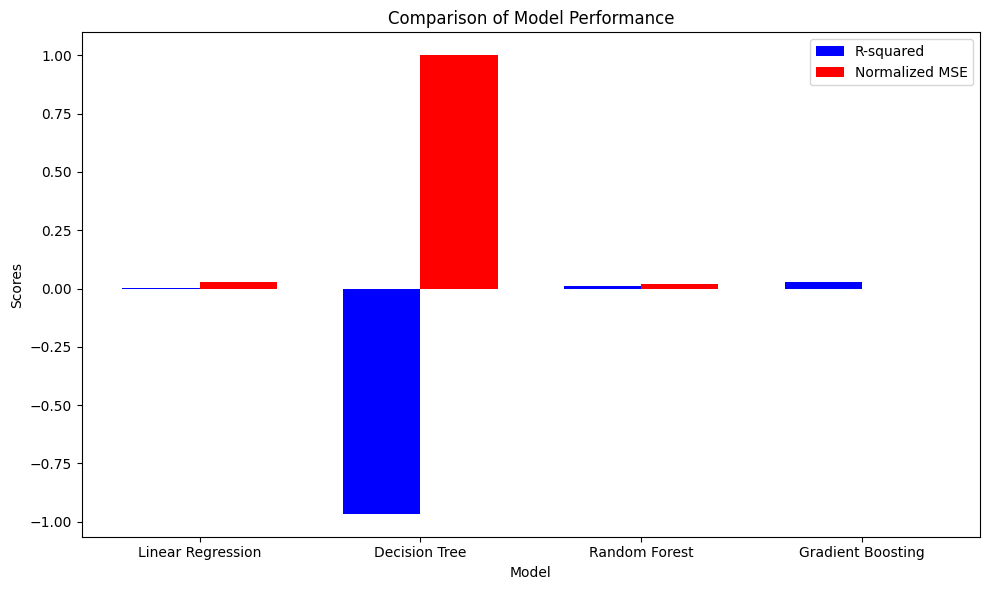

In [26]:
# Normalize the MSE for better comparison in the bar chart
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
metrics_df['Normalized MSE'] = scaler.fit_transform(metrics_df[['MSE']])

plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(metrics_df))

plt.bar(index, metrics_df['R-squared'], bar_width, label='R-squared', color='b')
plt.bar(index + bar_width, metrics_df['Normalized MSE'], bar_width, label='Normalized MSE', color='r')

plt.xlabel('Model')
plt.ylabel('Scores')
plt.title('Comparison of Model Performance')
plt.xticks(index + bar_width / 2, metrics_df.index)
plt.legend()
plt.tight_layout()
plt.show()


Scatter Plot with Annotations

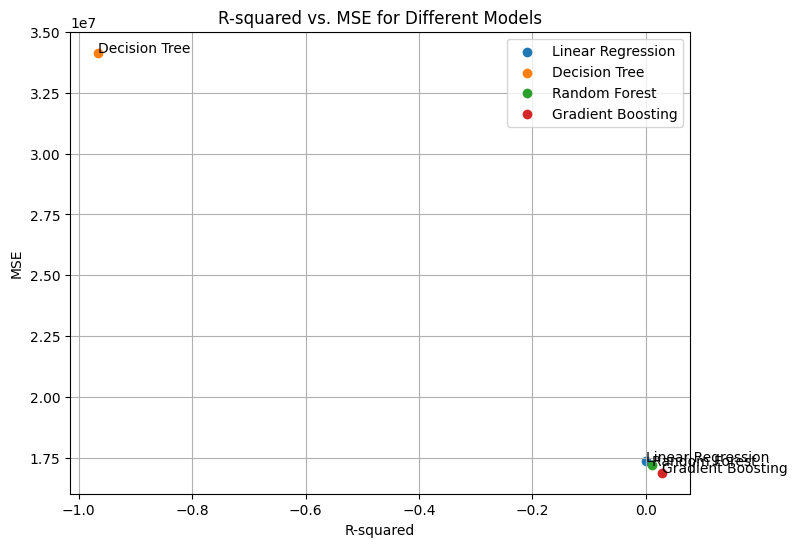

In [27]:
plt.figure(figsize=(8, 6))

# Plot each point and annotate
for idx, row in metrics_df.iterrows():
    plt.scatter(row['R-squared'], row['MSE'], label=idx)

    # Annotation
    plt.text(row['R-squared'], row['MSE'], idx)

plt.xlabel('R-squared')
plt.ylabel('MSE')
plt.title('R-squared vs. MSE for Different Models')
plt.legend()
plt.grid(True)
plt.show()


Radar Chart for Multiple Metrics

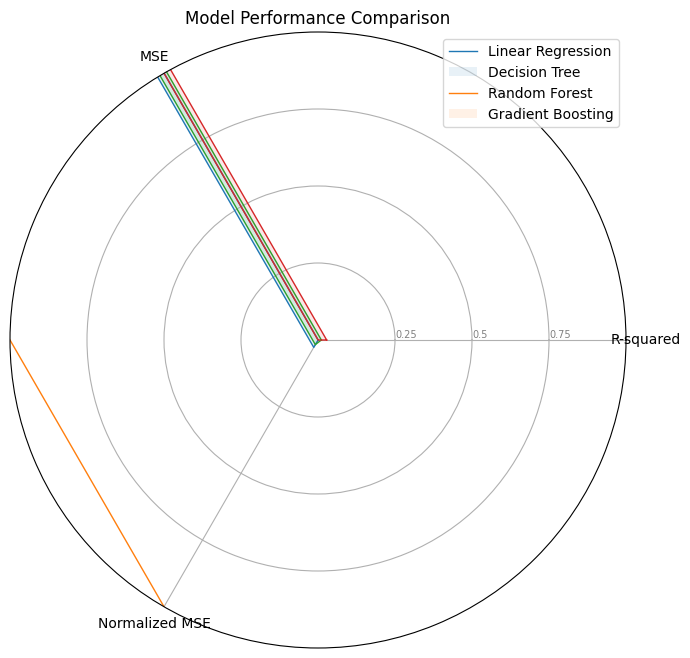

In [28]:
from math import pi

# Number of variables we're plotting.
num_vars = len(metrics_df.columns)

# Compute angle for each axis
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]  # Complete the loop

# Plot each model's performance
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Draw one axe per variable + add labels
plt.xticks(angles[:-1], metrics_df.columns)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0.25, 0.5, 0.75], ["0.25", "0.5", "0.75"], color="grey", size=7)
plt.ylim(0,1)

# Individually add each model's performance in the radar chart
for idx, row in metrics_df.iterrows():
    values = row.values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=idx)
    ax.fill(angles, values, alpha=0.1)

plt.title('Model Performance Comparison')
plt.legend(metrics_df.index, loc='upper right')
plt.show()


Based on results, the Gradient Boosting model performs the best among the tested models, with the highest R-squared value of 0.028140 and the lowest Mean Squared Error (MSE) of 16,883,630. However, all models exhibit low R-squared values, indicating limited explanatory power for water usage variance. The Decision Tree model notably underperforms, yielding negative R-squared. Despite Gradient Boosting leading, the overall model performances suggest a need for further exploration, such as enhanced feature engineering, additional data, or alternative modeling approaches, to improve predictive accuracy.